# E6_movie_review_emotion_analysis

목차<br/>
0 package import<br/>
1 data load and preprocessing<br/>

## 0 package import
* konlpy : 한국어 NLP관련 패키지
     Mecab konlpy 한국어 토큰화 함수 
* collections : 

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
import re

import seaborn as sns
import matplotlib.pyplot as plt

from konlpy.tag import Mecab
from collections import Counter
from gensim.models import KeyedVectors, Word2Vec

import keras
import tensorflow as tf
from tensorflow.keras.initializers import Constant


## 1 data load and preprocessing
1-1) 데이터 로드 및 확인<br/>
1-2) 데이터 결측값 및 중복 제거<br/>
1-3) 데이터 확인<br/>
1-4) 문자열(한국어) 토큰화 & 불용어 제거


### 1-1) 데이터 로드 및 확인

In [2]:
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


### 1-2) 데이터 결측값 및 중복 제거

In [5]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [6]:
train_data.drop_duplicates(subset=['document'], inplace=True)
test_data.drop_duplicates(subset=['document'], inplace=True)


In [7]:
def k(x):
    return re.sub(r'["ㅋ"]+', "ㅋ", str(x)) 
def h(x):
    return re.sub(r'["ㅎ"]+', "ㅎ", str(x))
def j(x):
    return re.sub(r'["."]+', ".", str(x))

In [8]:
train_data["document"]=train_data["document"].map(lambda x: k(x))
test_data["document"]=test_data["document"].map(lambda x: k(x))
train_data["document"]=train_data["document"].map(lambda x: h(x))
test_data["document"]=test_data["document"].map(lambda x: h(x))
train_data["document"]=train_data["document"].map(lambda x: j(x))
test_data["document"]=test_data["document"].map(lambda x: j(x))

### 1-3) 데이터 확인

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146182 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        146182 non-null  int64 
 1   document  146182 non-null  object
 2   label     146182 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.5+ MB


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49157 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49157 non-null  int64 
 1   document  49157 non-null  object
 2   label     49157 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [11]:
train_data.head()

,id,document,label
0,9976970,아 더빙. 진짜 짜증나네요 목소리,0
1,3819312,흠.포스터보고 초딩영화줄.오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 .솔직히 재미는 없다.평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [12]:
test_data.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은. 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임. 돈주고 보기에는.,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


* 데이터 읽어드려서 결측값(na)와 중복값 제거
* head로 데이터 확인 결과 후기 내용과 label 값이 부합하지 않는 경우 확인 >> 모델에 악영향


### 1-4) 한국어 토큰화 & 불용어 제거

In [13]:
tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','을','한테']

In [14]:
X_train = []
for sentence in train_data['document']:
    temp_X = tokenizer.morphs(sentence) 
    temp_X = [word for word in temp_X if not word in stopwords]
    X_train.append(temp_X)

X_test = []
for sentence in test_data['document']:
    temp_X = tokenizer.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] 
    X_test.append(temp_X)

In [15]:
# 데이터 확인
for sentence in train_data['document'][:21]:
    temp_X = tokenizer.morphs(sentence) 
    temp_X = [word for word in temp_X if not word in stopwords]
    print(sentence)
    print(temp_X)

아 더빙. 진짜 짜증나네요 목소리
['아', '더', '빙', '.', '진짜', '짜증', '나', '네요', '목소리']
흠.포스터보고 초딩영화줄.오버연기조차 가볍지 않구나
['흠', '.', '포스터', '보고', '초딩', '영화', '줄', '.', '오버', '연기', '조차', '가볍', '지', '않', '구나']
너무재밓었다그래서보는것을추천한다
['너무', '재', '밓었다그래서보는것을추천한다']
교도소 이야기구먼 .솔직히 재미는 없다.평점 조정
['교도소', '이야기', '구먼', '.', '솔직히', '재미', '없', '다', '.', '평점', '조정']
사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다
['사이몬페그', '익살', '스런', '연기', '돋보였', '던', '영화', '!', '스파이더맨', '에서', '늙', '어', '보이', '기', '만', '했', '던', '커스틴', '던스트', '너무나', '이뻐', '보였', '다']
막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋ.별반개도 아까움.
['막', '걸음마', '뗀', '3', '세', '부터', '초등', '학교', '1', '학년', '생', '인', '8', '살', '용', '영화', '.', 'ㅋ', '.', '별반', '개', '아까움', '.']
원작의 긴장감을 제대로 살려내지못했다.
['원작', '긴장감', '제대로', '살려', '내', '지', '못했', '다', '.']
별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지.정말 발로해도 그것보단 낫겟다 납치.감금만반복반복.이드라마는 가족도없다 연기못하는사람만모엿네
['별', '반개', '아깝', '다', '욕', '나온다', '이응경', '길용우', '연기', '생활', '몇', '년', '인지', '.', '정말', '발', '로', '해도', '그것', '보단', '낫', '겟', '다', '납치', '.', '

In [16]:
X_train[20]

['나름', '심오', '뜻', '있', '듯', '.', '그냥', '학생', '선생', '놀아나', '영화', '절대', '아님']

* konlpy Mecab()으로 토크나이저 함수 객체 생성
* morphs : 문장을 형태소로 분해
* stopwords에 속하지 않는 분해된 형태소들을 X_train에 다시 저장

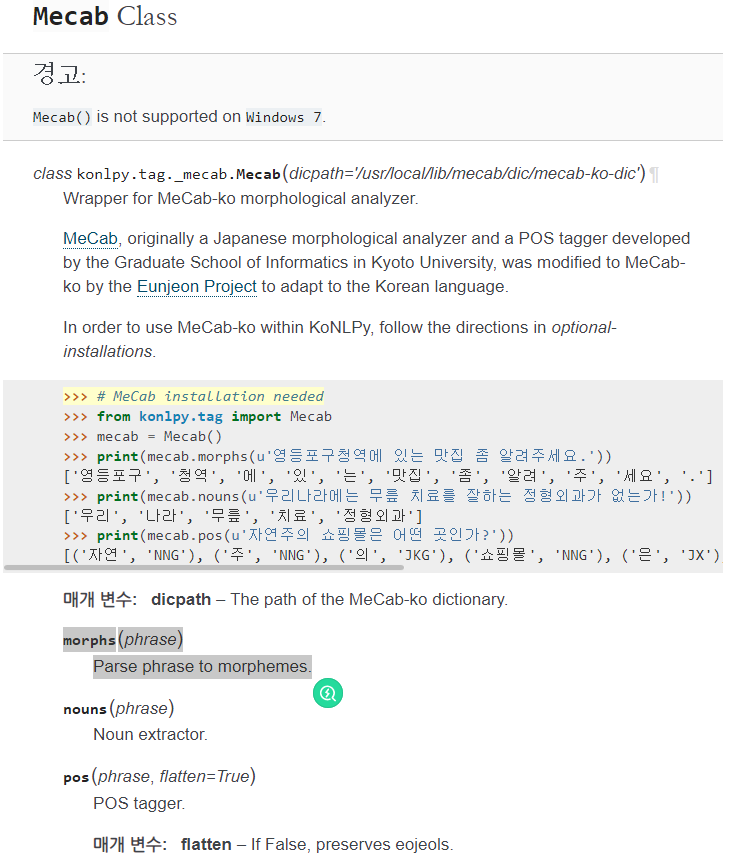

In [17]:
train_data['document'][0]

'아 더빙. 진짜 짜증나네요 목소리'

In [18]:
X_train[0]

['아', '더', '빙', '.', '진짜', '짜증', '나', '네요', '목소리']

* 토큰에 저장된 단어와 실제 데이터 간의 차이로 인해 train data의 토큰화가 완벽하지 않음


문자열분 많이 사용하는 부분만 사용하기

In [19]:
words=[]
for i in X_train+X_test: 
    words.extend(i)     
counter = Counter(words)
len(counter)

60820

In [20]:
counter = counter.most_common(10000-4)
vocab = ["<PAD>", "<BOS>", "<UNK>", "<UNUSED>"] + [key for key, _ in counter]
word_to_index = {word:index for index, word in enumerate(vocab)}

In [21]:
def wordlist_to_indexlist(wordlist):
    return [word_to_index[word] if word in word_to_index else word_to_index["<UNK>"] for word in wordlist]

X_train2 = list(map(wordlist_to_indexlist, X_train))
X_test2 = list(map(wordlist_to_indexlist, X_test))



In [22]:
X_train2[20]

[387, 1910, 1458, 14, 74, 4, 89, 1553, 1122, 7787, 5, 414, 608]

* 토큰화 한 형태소 원하는 인덱스: 단어의 딕셔너리 형태로 변환
* words 리스트 생성 후 X_train, X_test를 합쳐 빈도수 상위 9996개만 추출하고 4개는 특수한 목적의 토큰 삽입
* train과 test를 words에 있는 단어면 유지 아니면 UNK로 변환

In [23]:
X_train2[0]

[31, 68, 872, 4, 37, 219, 19, 32, 726]

In [24]:
y_train = train_data['label'].to_numpy()
y_test = test_data['label'].to_numpy()

In [25]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

In [26]:
index_to_word = {index:word for word, index in word_to_index.items()}

In [27]:
print(train_data["document"][20])
print(X_train2[20])
print(get_decoded_sentence(X_train2[20],index_to_word))

나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님
[387, 1910, 1458, 14, 74, 4, 89, 1553, 1122, 7787, 5, 414, 608]
심오 뜻 있 듯 . 그냥 학생 선생 놀아나 영화 절대 아님


In [28]:
train_len=[len(i) for i in X_train2]
test_len=[len(i) for i in X_test2]

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd2380fa8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd2380ecac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd238103820>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd2380dfb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd2380df280>],
 'means': []}

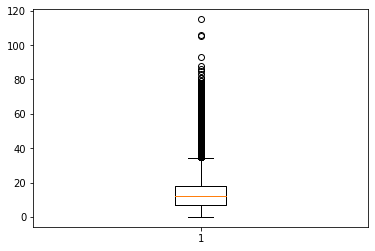

In [29]:
plt.boxplot(train_len+test_len)

In [30]:
maxlen = 45

In [31]:
X_train2 = tf.keras.preprocessing.sequence.pad_sequences(X_train2,
                                                        value=word_to_index['<PAD>'],
                                                        padding='pre',
                                                        maxlen=maxlen)

X_test2 = tf.keras.preprocessing.sequence.pad_sequences(X_test2,
                                                       value=word_to_index["<PAD>"],
                                                        padding='pre',
                                                        maxlen=maxlen)


konlpy.tag.Mecab 클래스의 morphs: 입력받은 문장을 형태소로 바꾸는 함수


In [32]:
x_train, x_val, y_train, y_val=train_test_split(X_train2, y_train, test_size=0.2, stratify=y_train, random_state=42, shuffle=True)

In [33]:
x_train.shape

(116945, 45)

embedding_dim은 200이 고정 >> 확인 필요

In [44]:
def rnn_model(words=10000, embedding_dim=200):

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(words, embedding_dim, input_shape=(None,)))
    model.add(tf.keras.layers.LSTM(10))   
    model.add(tf.keras.layers.Dense(10, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

    model.summary()
    return model

In [35]:
def cnn_1d_model(words=10000, embedding_dim=200):

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(words, embedding_dim))
    model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
    model.add(tf.keras.layers.MaxPooling1D(5))
    model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
    model.add(tf.keras.layers.GlobalMaxPooling1D())
    model.add(tf.keras.layers.Dense(8, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

    model.summary()
    return model

In [36]:
def globalmaxpool_model(words=10000, embedding_dim=300):

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(words, embedding_dim, input_shape=(None,)))
    model.add(tf.keras.layers.GlobalMaxPooling1D())
    model.add(tf.keras.layers.Dense(10, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

    model.summary()
    return model

In [37]:
rnn_model = rnn_model()
rnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
rnn_train = rnn_model.fit(x_train,y_train,epochs=20,batch_size = 512,validation_data =(x_val,y_val),verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         2000000   
_________________________________________________________________
lstm (LSTM)                  (None, 10)                8440      
_________________________________________________________________
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 2,008,561
Trainable params: 2,008,561
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
229/229 - 5s - loss: 0.4856 - accuracy: 0.7867 - val_loss: 0.3579 - val_accuracy: 0.8441
Epoch 2/20
2

In [38]:
cnn_1d_model = cnn_1d_model()
cnn_1d_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
cnn_1d_train = cnn_1d_model.fit(x_train,y_train,epochs=20,batch_size = 512,validation_data =(x_val,y_val),verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 200)         2000000   
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          22416     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                

In [39]:
globalmaxpool_model = globalmaxpool_model()
globalmaxpool_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
globalmaxpool_train = globalmaxpool_model.fit(x_train,y_train,epochs=20,batch_size = 512,validation_data =(x_val,y_val),verbose=2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 300)         3000000   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3010      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 3,003,021
Trainable params: 3,003,021
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
229/229 - 2s - loss: 0.5230 - accuracy: 0.7553 - val_loss: 0.3678 - val_accuracy: 0.8433
Epoch 2/20

In [40]:
rnn_loss=pd.DataFrame(rnn_train.history)
cnn_1d_loss=pd.DataFrame(cnn_1d_train.history)
globalmaxpool_loss=pd.DataFrame(globalmaxpool_train.history)

(0.0, 1.0)

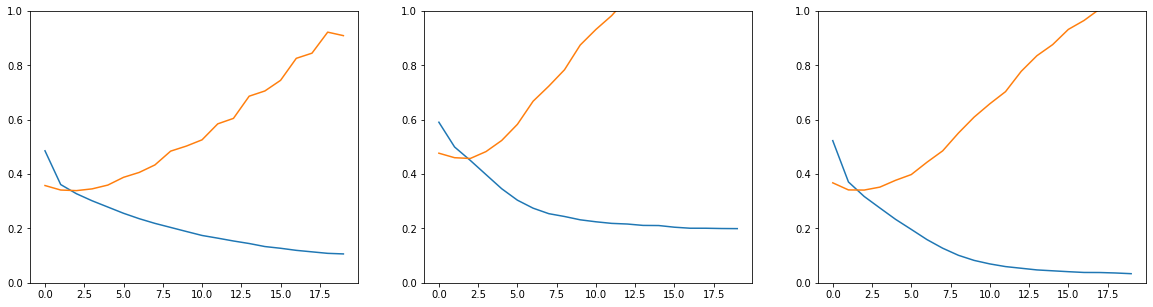

In [41]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
plt.plot(rnn_loss['loss'])
plt.plot(rnn_loss['val_loss'])
plt.ylim((0,1))

plt.subplot(1,3,2)
plt.plot(cnn_1d_loss['loss'])
plt.plot(cnn_1d_loss['val_loss'])
plt.ylim((0,1))
plt.subplot(1,3,3)
plt.plot(globalmaxpool_loss['loss'])
plt.plot(globalmaxpool_loss['val_loss'])
plt.ylim((0,1))

에포크 초기 부터 오버피팅 발생 >> early stop 필요
rnn model이 가장 성능이 놓음

In [45]:
rnn_model = rnn_model()
rnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
rnn_train = rnn_model.fit(x_train,y_train,epochs=3,batch_size = 512,validation_data =(x_val,y_val),verbose=2)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 200)         2000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                8440      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 2,008,561
Trainable params: 2,008,561
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
229/229 - 3s - loss: 0.4793 - accuracy: 0.7844 - val_loss: 0.3626 - val_accuracy: 0.8421
Epoch 2/3
2

In [46]:
embedding_layer = rnn_model.layers[0]
weights =embedding_layer.get_weights()[0]
print(weights.shape)

(10000, 200)


In [47]:
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(9996, 200))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = rnn_model.get_weights()[0]
for i in range(4,10000):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [48]:
word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/ko.bin'
word2vec = Word2Vec.load(word2vec_path)
vector = word2vec['영화']
vector 

/tmp/ipykernel_1075/1439624439.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vector = word2vec['영화']


array([-1.7577837 , -1.0874279 ,  1.5300866 , -0.1115231 , -0.37980682,
        1.4828517 ,  1.3180419 ,  0.11094163,  0.7430535 , -0.45461136,
        0.58841336,  0.5763913 ,  1.210707  ,  1.3132795 , -0.86962503,
       -0.18507595, -0.47440064,  1.5100725 ,  1.0965794 ,  1.0600823 ,
       -0.27457932, -0.70003706,  2.3117511 ,  1.4944884 ,  0.25560892,
       -2.866659  , -0.28312334,  0.34263936, -0.67723423,  0.71714777,
        0.25549442,  0.71732044, -0.13262457,  0.01792452, -0.3184774 ,
        0.5271619 ,  0.7561084 , -2.1247065 ,  1.061429  , -0.21065854,
        0.6877343 , -1.4956383 ,  0.60346967, -2.6955893 ,  0.37694618,
       -1.0164185 ,  0.5430663 ,  0.1200121 , -2.6315718 ,  0.6216742 ,
        1.1583976 , -2.5385962 ,  1.326312  , -0.10284371, -0.0286147 ,
       -0.9132947 ,  0.7647564 ,  0.79202783, -1.8625957 , -0.7418395 ,
        0.5884277 , -0.9917992 , -0.62114453,  1.5367815 , -0.6628939 ,
        0.6712103 ,  0.12914915,  0.21228492,  0.9017655 , -0.25

In [51]:
word2vec.wv.most_similar("재미")

[('취미', 0.5857348442077637),
 ('유머', 0.5140613913536072),
 ('매력', 0.5105490684509277),
 ('흥미', 0.4988338351249695),
 ('공짜', 0.4960595667362213),
 ('일자리', 0.49294644594192505),
 ('즐거움', 0.48700767755508423),
 ('비애', 0.4836210310459137),
 ('관객', 0.48286449909210205),
 ('향수', 0.4823310971260071)]

In [52]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 200  # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]

/tmp/ipykernel_1075/1730871920.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if index_to_word[i] in word2vec:
/tmp/ipykernel_1075/1730871920.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embedding_matrix[i] = word2vec[index_to_word[i]]


In [55]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 45, 200)           2000000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 39, 16)            22416     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 16)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1, 16)             1808      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                

In [57]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/20
229/229 [==============================] - 2s 8ms/step - loss: 0.6564 - accuracy: 0.6003 - val_loss: 0.5810 - val_accuracy: 0.6893
Epoch 2/20
229/229 [==============================] - 2s 7ms/step - loss: 0.5780 - accuracy: 0.7110 - val_loss: 0.5302 - val_accuracy: 0.7304
Epoch 3/20
229/229 [==============================] - 2s 7ms/step - loss: 0.5338 - accuracy: 0.7422 - val_loss: 0.4976 - val_accuracy: 0.7459
Epoch 4/20
229/229 [==============================] - 2s 7ms/step - loss: 0.5026 - accuracy: 0.7635 - val_loss: 0.4932 - val_accuracy: 0.7543
Epoch 5/20
229/229 [==============================] - 2s 7ms/step - loss: 0.4778 - accuracy: 0.7769 - val_loss: 0.4948 - val_accuracy: 0.7571
Epoch 6/20
229/229 [==============================] - 2s 7ms/step - loss: 0.4608 - accuracy: 0.7869 - val_loss: 0.4914 - val_accuracy: 0.7507
Epoch 7/20
229/229 [==============================] - 2s 7ms/step - loss: 0.4424 - accuracy: 0.7958 - val_loss: 0.5091 - val_accuracy: 0.7532
Epoch 

In [58]:
fine_hist = pd.DataFrame(history.history)

(0.0, 1.0)

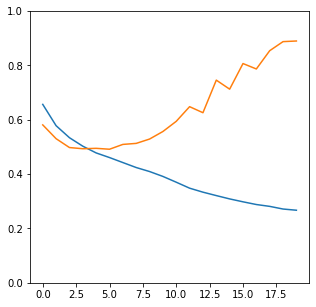

In [60]:
plt.figure(figsize = (5,5))
plt.plot(fine_hist['loss'])
plt.plot(fine_hist['val_loss'])
plt.ylim((0,1))

## 회고
* 전이학습이 마냥 좋은 것은 아니다
* 한국어 형태에 대한 지식이 부족